## Mood classfication using CNN (HAPPY / SAD)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images & it will automatically lable all the images

In [3]:
img = image.load_img(r'/content/drive/MyDrive/Colab Notebooks/CNN - Happy  or Sad/training/happy/3.jpg.png')

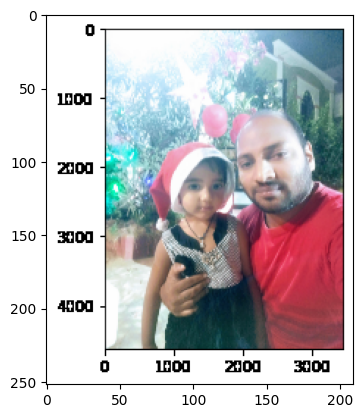

In [4]:
plt.imshow(img)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
i1 = cv2.imread(r'/content/drive/MyDrive/Colab Notebooks/CNN - Happy  or Sad/training/happy/3.jpg.png')
i1
# 3 dimension metrics are created for the image
# the value ranges from 0-255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [6]:
i1.shape
# shape of your image height, weight, rgb

(252, 209, 3)

In [7]:
train = ImageDataGenerator(rescale = 1/255)
validataion = ImageDataGenerator(rescale = 1/255)
# to scale all the images i need to divide with 255
# we need to resize the image using 200, 200 pixel

In [8]:
train_dataset = train.flow_from_directory(r'/content/drive/MyDrive/Colab Notebooks/CNN - Happy  or Sad/training',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validataion_dataset = validataion.flow_from_directory(r'/content/drive/MyDrive/Colab Notebooks/CNN - Happy  or Sad/validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 1 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [9]:
train_dataset.class_indices

{'.ipynb_checkpoints': 0, 'happy': 1}

In [10]:
train_dataset.classes

array([1], dtype=int32)

In [11]:
# now we are applying maxpooling

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
              metrics = ['accuracy']
              )

In [13]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 10,
                     validation_data = validataion_dataset)

Epoch 1/10
1/3 [=========>....................] - ETA: 3s - loss: 0.7323 - accuracy: 0.0000e+00

3/3 [==============================] - 2s 182ms/step - loss: 0.7323 - accuracy: 0.0000e+00


In [14]:
dir_path = r'/content/drive/MyDrive/Colab Notebooks/CNN - Happy  or Sad/testing'
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

2.png
5.png
4.png
8.png
6.png
7.png
9.png
10.png
3.jpg.png
1.png


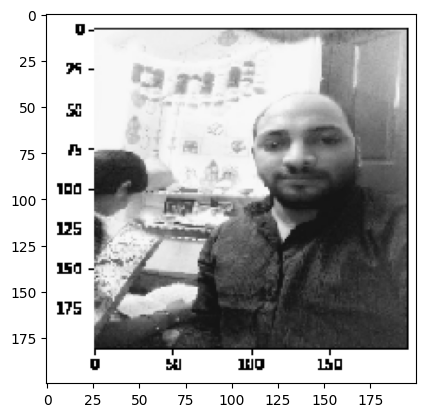

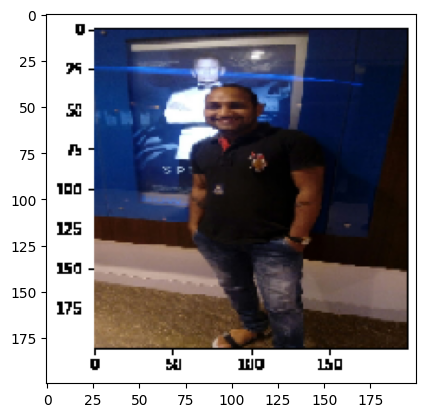

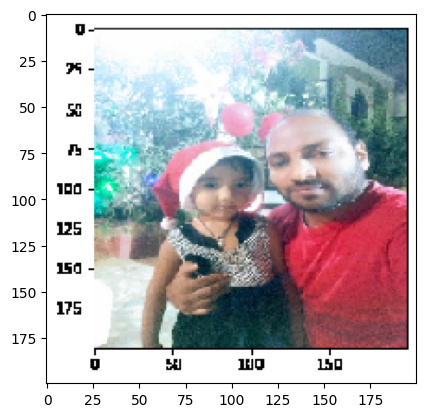

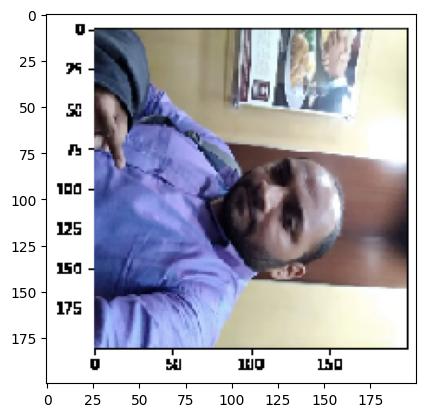

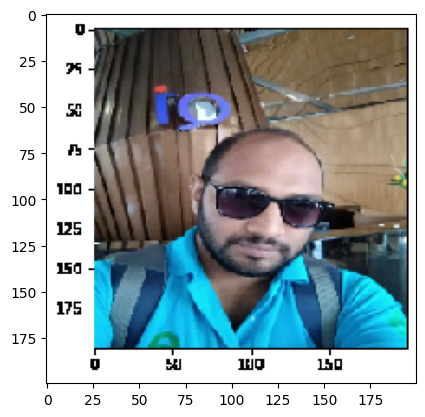

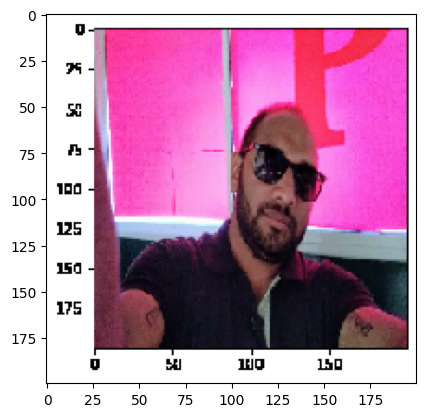

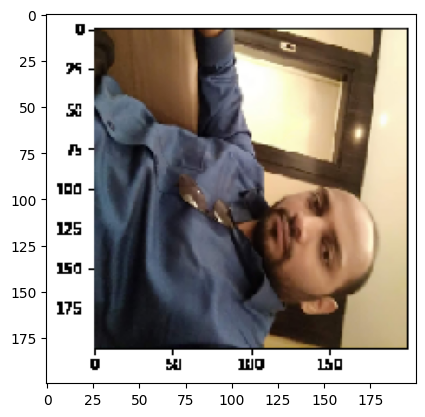

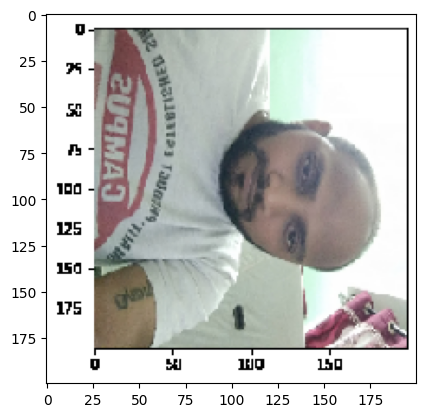

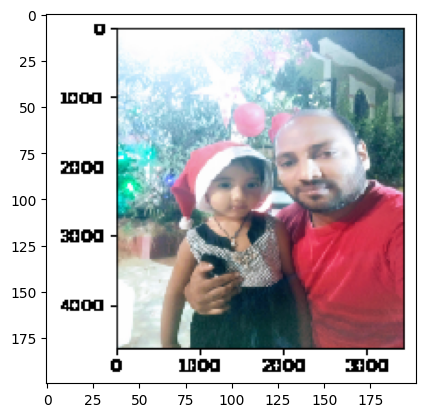

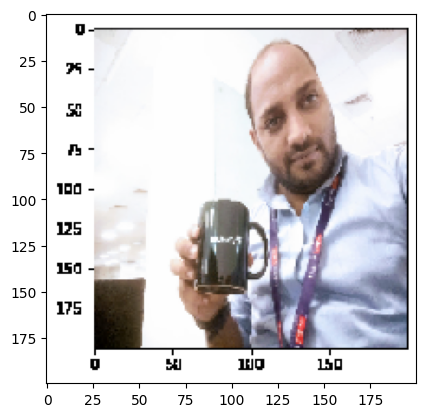

In [15]:
dir_path = r'/content/drive/MyDrive/Colab Notebooks/CNN - Happy  or Sad/testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

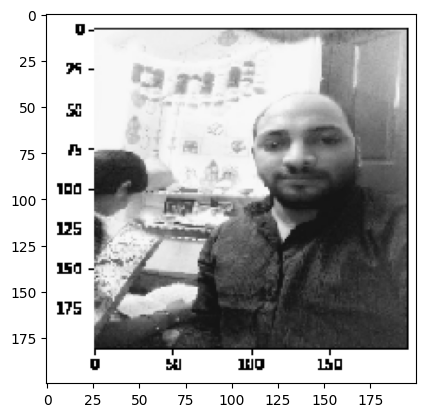

1/1 [==============================] - 0s 164ms/step
i am happy


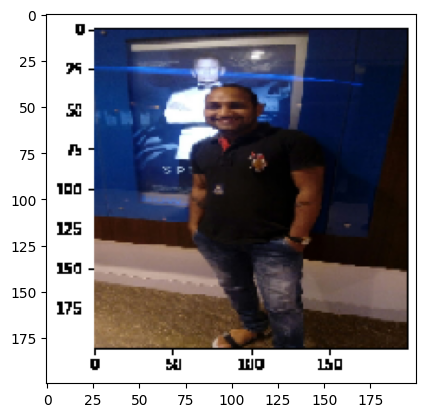

1/1 [==============================] - 0s 39ms/step
i am happy


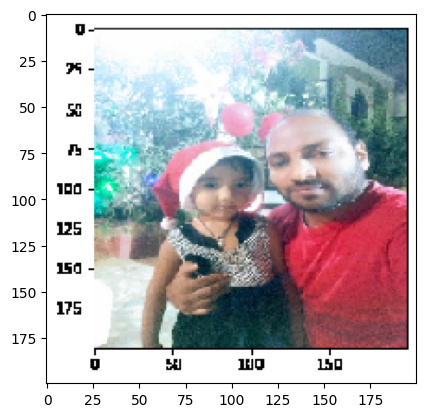

1/1 [==============================] - 0s 44ms/step
i am happy


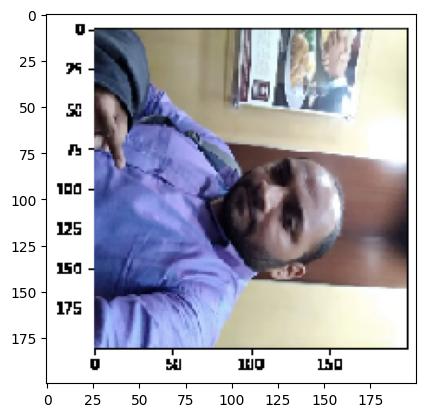

1/1 [==============================] - 0s 41ms/step
i am happy


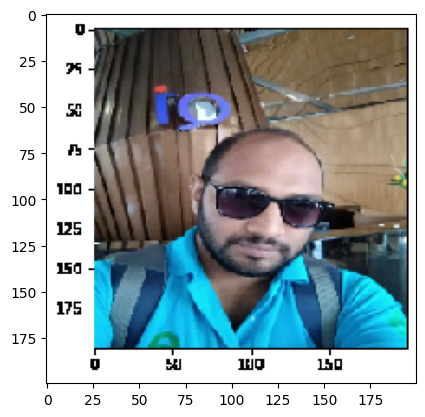

1/1 [==============================] - 0s 53ms/step
i am happy


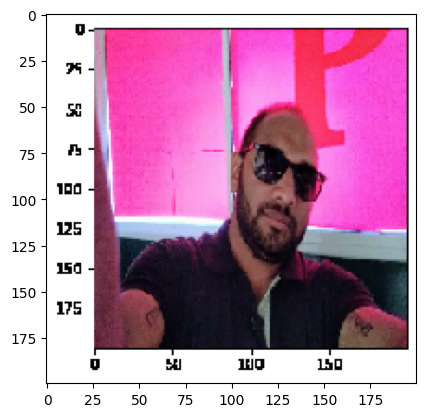

1/1 [==============================] - 0s 44ms/step
i am happy


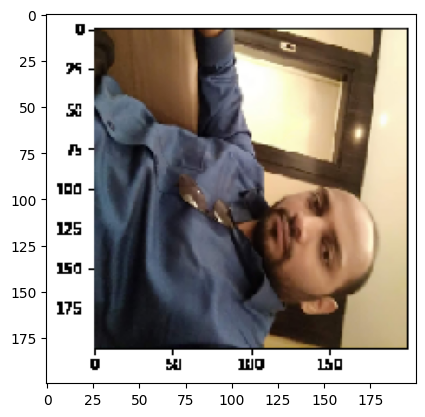

1/1 [==============================] - 0s 42ms/step
i am happy


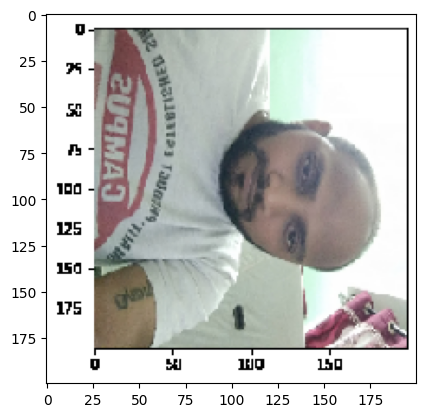

1/1 [==============================] - 0s 55ms/step
i am happy


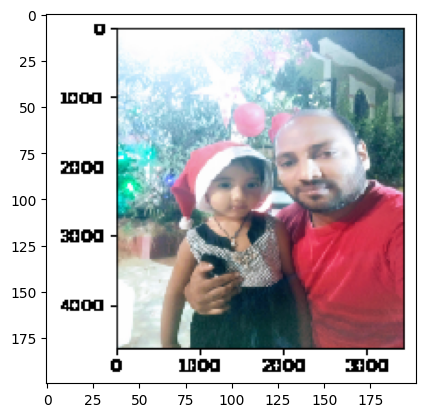

1/1 [==============================] - 0s 56ms/step
i am happy


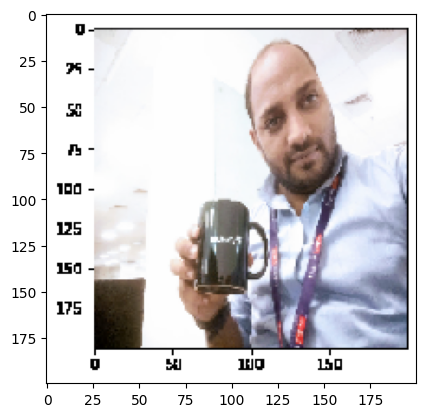

1/1 [==============================] - 0s 45ms/step
i am happy


In [17]:
dir_path = r'/content/drive/MyDrive/Colab Notebooks/CNN - Happy  or Sad/testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    val = model.predict(images)
    if val == 0:
        print( ' i am not happy')
    else:
        print('i am happy')